# 2ème Challenge

In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Pour la première partie on ajoute une contribution systématique et constante $c dt$ au déplacement $dx$ de sorte que :

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

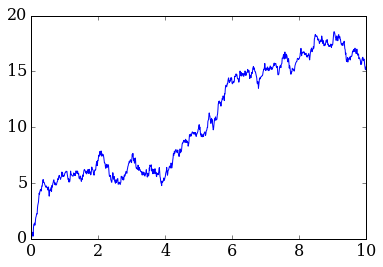

In [45]:
T=10.0

nt=1000
dt=T/nt

alpha=2.0
c=2

t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2* alpha *dt)*numpy.random.normal(0,1)+ c*dt

pyplot.plot(t,x)


In [4]:
npart=100000

x0 = numpy.random.normal(loc=0,scale=1,size=npart)

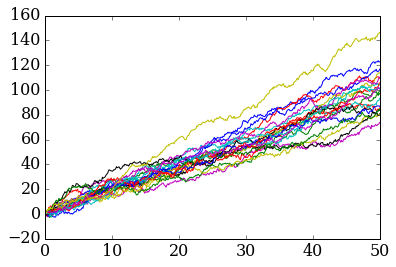

In [49]:
T=50.0
nt=500
dt=T/nt
alpha=3

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha *dt)*numpy.random.normal(0,1,npart) + c*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

On remarque que les 20 particules indépendantes furent déviées de la même manière vers les x positifs (par notre choix de c>0). Le terme cdt influence donc notre mouvement brownien en décalant les positions des particules.

Regardons maintenant la forme de la distribution de probabilité à la fin des itérations et essayons de fiter une courbe par dessus.

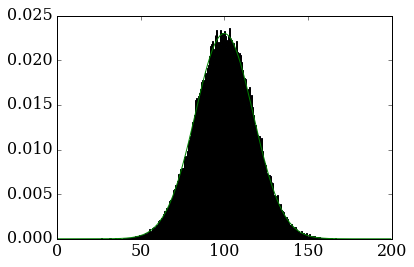

In [50]:
binwidth=0.5
bins=numpy.arange(0,2*c*T,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

pyplot.hist(x[nt],bins,normed=True);

sigma = 1
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

Avec une contribution $c dt$ supplémentaire pour tout $dx$, l'équation de diffussion devient :

\begin{eqnarray}
\frac{\partial \rho}{\partial t}&=&\alpha \frac{\partial^2 \rho}{\partial x^2} -+  c \frac{\partial \rho}{\partial x}
\end{eqnarray}

En effet, cette contribution se comporte comme une vitesse constante.

En résolvant cela, on obtient la densité de probabilité suivante : 
$$
\large
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-ct)^2}{2\sigma_t^2}}
$$
où $\sigma^2_t = 2\alpha t + \sigma^2$ et $\sigma$ est l'écart-type de notre distribution de départ (dans notre cas $\sigma = 1$). Cela ressemble fort à la solution lorsqu'il n'y a pas de contribution systématique (à savoir $c=0$). En effet, la seule différence est que la moyenne a été déplacée d'un facteur $ct$.

Ensuite, on simule un pas aléatoire avec un terme de friction :

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Ceci correspond à une force de rappel qui va forcer notre particule à rester autour de $0$. 

On commence d'abord par un temps équivalent à l'exercice précédent ($t=10s$).

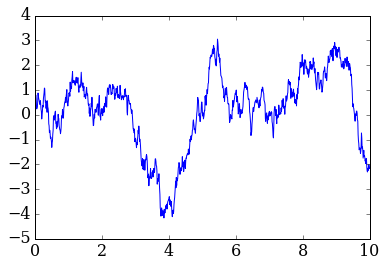

In [99]:
T=10

nt=1000
dt=T/nt

alpha=2.0
gamma=1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=(1 - gamma * dt) * x[i]+ numpy.sqrt(2* alpha *dt) * numpy.random.normal(0,1)

pyplot.plot(t,x)


La pas reste encore relativement aléatoire.

Faisons maintenant tendre le temps vers l'infini ($t=1000s$).

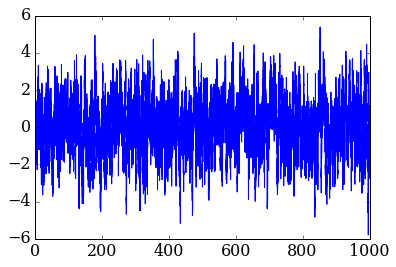

In [52]:
T=1000
nt=100000
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=(1 - gamma * dt) * x[i]+numpy.sqrt(2* alpha *dt) * numpy.random.normal(0,1)

pyplot.plot(t,x)

On voit que pour des temps longs, la particule reste confiner autour de 0 et tend vers un état stable. On peut vérifier que cela n'est pas juste le hasard en faisant de même avec 20 particules indépendantes.

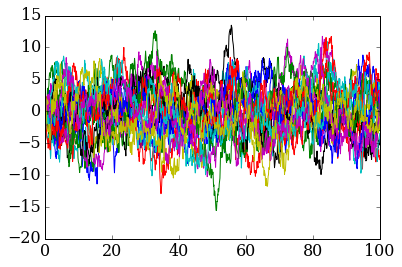

In [5]:
T=100
nt=1000
dt=T/nt
alpha=2.689
gamma=0.2547

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+alpha*numpy.sqrt(dt)*numpy.random.normal(0,1,npart) - gamma*x[i]*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

On remarque bien que le résultat reste le même et que cela n'est donc pas du au hasard. Lorsque que l'on intègre un terme de friction dans le pas aléatoire, le système tend vers des positions confinées autour de 0 aux temps longs.

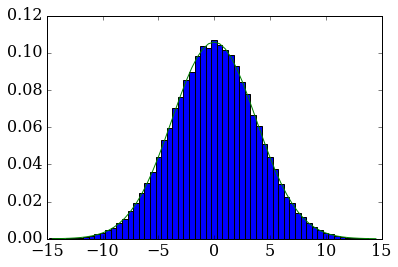

In [6]:
binwidth=0.5
bins=numpy.arange(-15,15,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

pyplot.hist(x[nt],bins,normed=True);

sigma = 1
sigmat2=(2*alpha*T+sigma**2)/(4/alpha*gamma*T)
pyplot.plot(bin_centers, numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

En chipotant un peu, on obtient comme valeur de fit : 
$$
\large
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{x^2}{2\sigma_t^2}}
$$
où $\large \sigma^2_t = \frac{\alpha^2}{2 \gamma} + \frac{\sigma^2}{4\gamma t}$ et $\sigma$ est l'écart-type de notre distribution de départ (dans notre cas $\sigma = 1$).

Après discussion en cours, le calcul de l'équation de diffusion serait trop complexe pour être réalisé et celui-ci comporterait en son sein un terme de convection supplémentaire alourdissant encore la tâche.
